In [140]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [141]:
df = pd.read_csv("../data/raw/car-accident-dataset/Road_Accident_Data.csv")

df.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [142]:
display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2).T,
    "Duplicates",
    df.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })


'Shape'

(307973, 21)

'Description'

,count,mean,std,min,25%,50%,75%,max
Latitude,307973.0,52.49,1.34,49.91,51.49,52.23,53.42,60.60
Longitude,307973.0,-1.37,1.36,-7.52,-2.25,-1.35,-0.21,1.76
Number_of_Casualties,307973.0,1.36,0.82,1.00,1.00,1.00,1.00,48.00
Number_of_Vehicles,307973.0,1.83,0.71,1.00,1.00,2.00,2.00,32.00
Speed_limit,307973.0,38.87,14.03,10.00,30.00,30.00,50.00,70.00


'Duplicates'

np.int64(1)

,Data Types,Missing Values,Unique Values,Sample Values
Accident_Index,object,0,197644,"[201001CW11825, 201001KD50105, 200920D295503]"
Accident Date,object,0,730,"[8/6/2021, 10/19/2022, 10/5/2021]"
Day_of_Week,object,0,7,"[Wednesday, Monday, Friday]"
Junction_Control,object,0,7,"[Give way or uncontrolled, Give way or uncontr..."
Junction_Detail,object,0,9,"[Private drive or entrance, Not at junction or..."
Accident_Severity,object,0,4,"[Slight, Slight, Slight]"
Latitude,float64,0,264362,"[52.196413, 52.551785, 51.636467]"
Light_Conditions,object,0,5,"[Daylight, Darkness - lights lit, Daylight]"
Local_Authority_(District),object,0,422,"[Liverpool, East Northamptonshire, Great Yarmo..."
Carriageway_Hazards,object,302549,5,"[nan, nan, nan]"


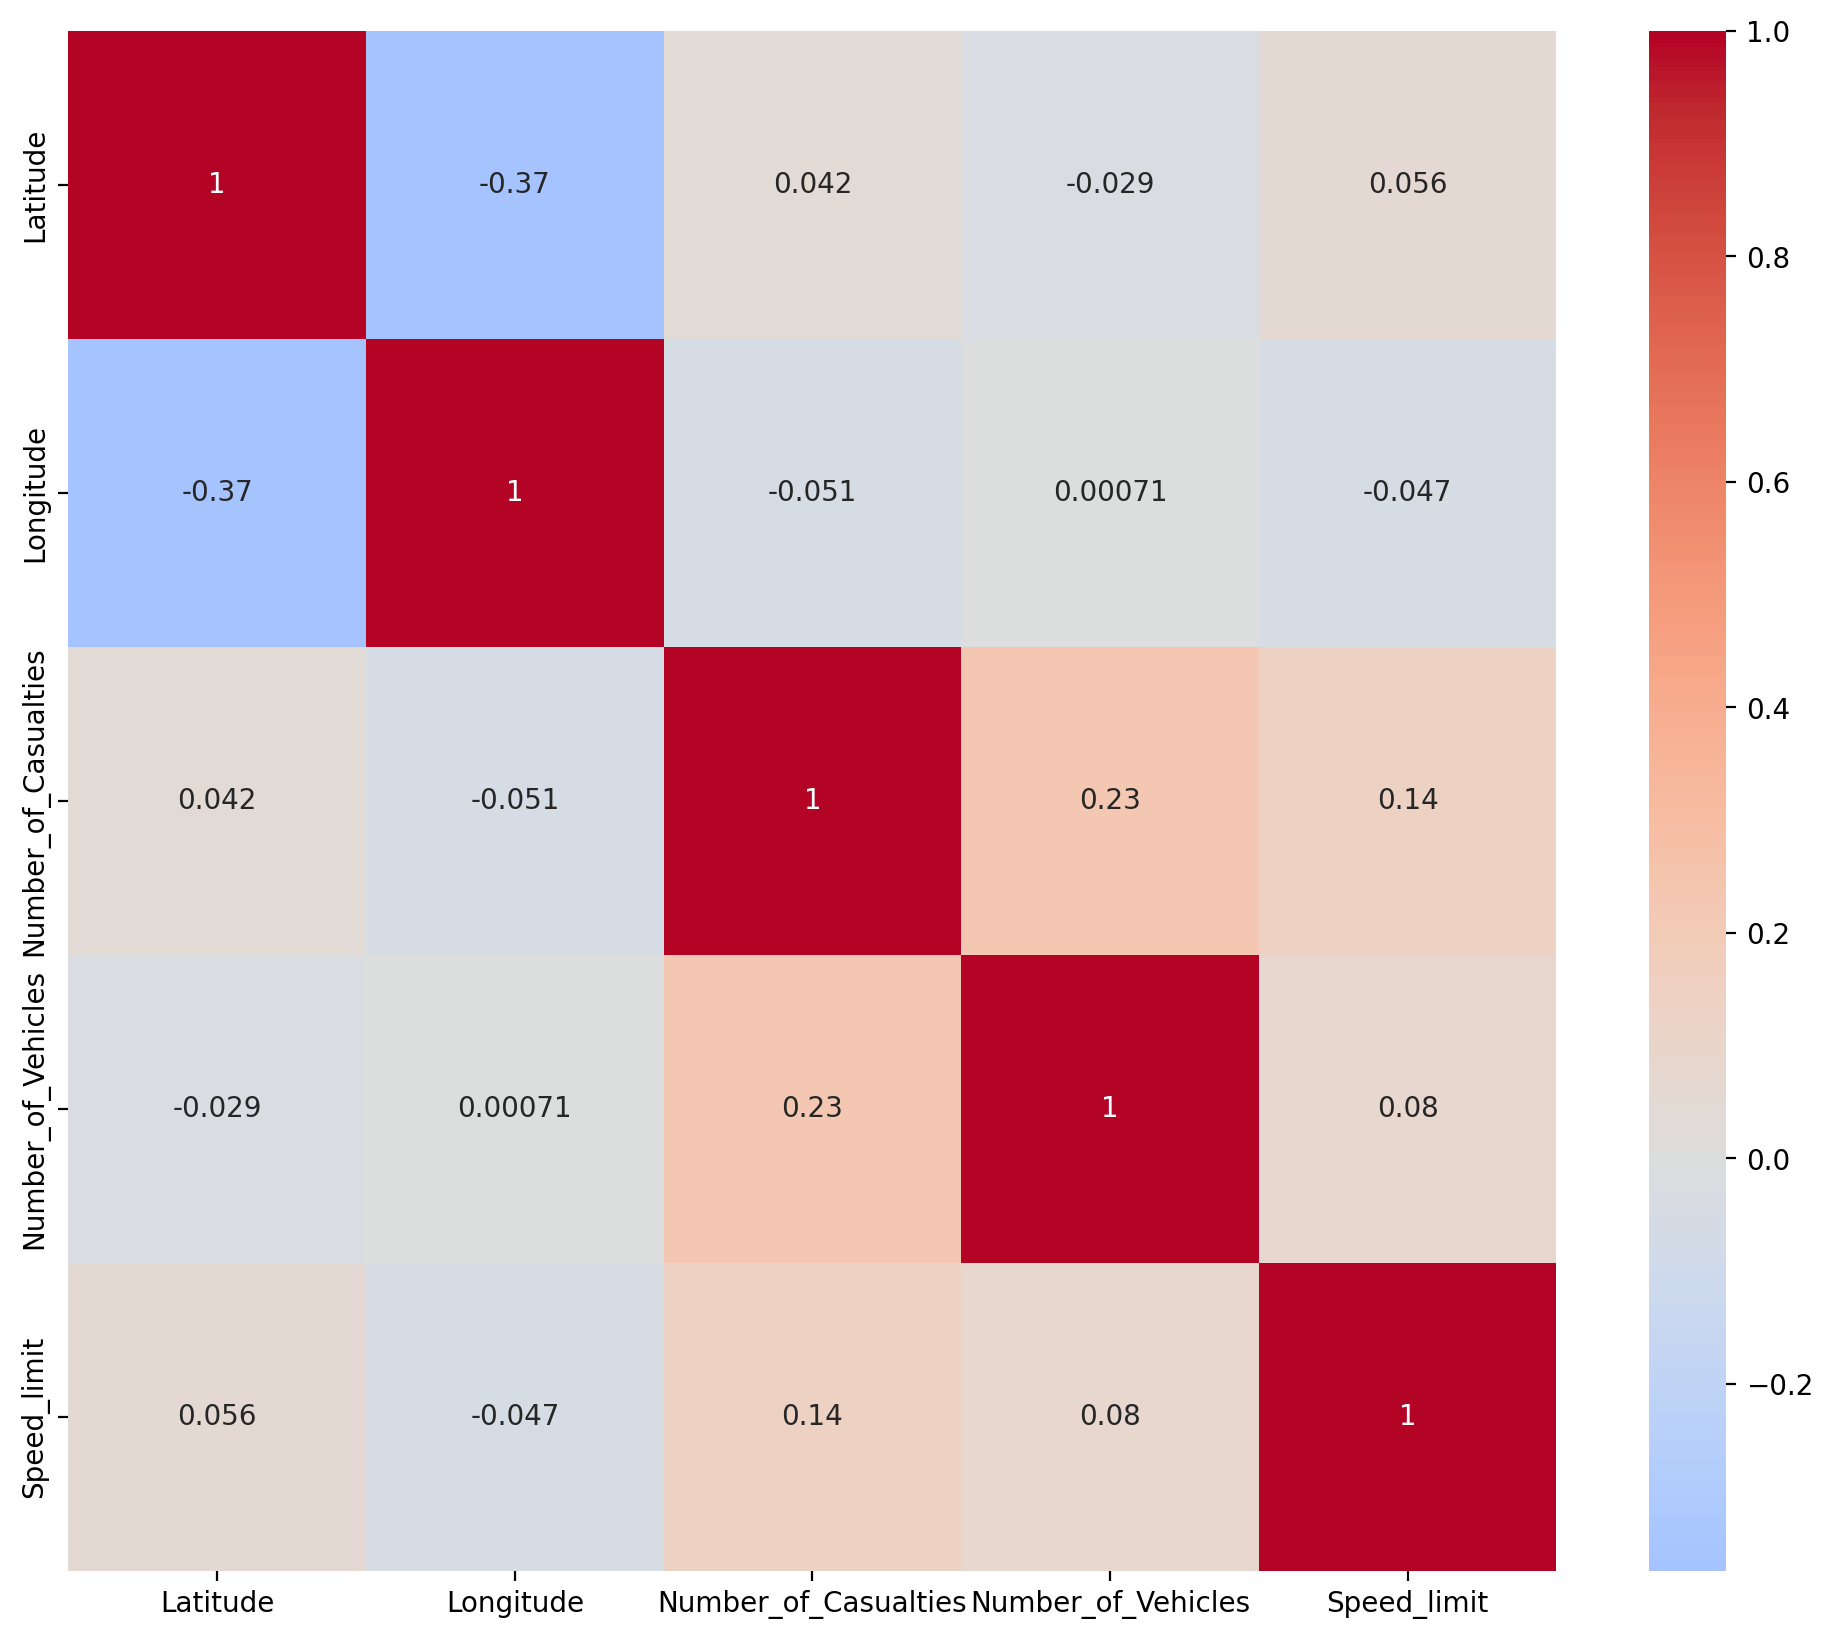

In [143]:
fig, ax = plt.subplots(figsize=(12, 10), dpi=200)

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0, ax=ax);

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Day_of_Week                 307973 non-null  object 
 3   Junction_Control            307973 non-null  object 
 4   Junction_Detail             307973 non-null  object 
 5   Accident_Severity           307973 non-null  object 
 6   Latitude                    307973 non-null  float64
 7   Light_Conditions            307973 non-null  object 
 8   Local_Authority_(District)  307973 non-null  object 
 9   Carriageway_Hazards         5424 non-null    object 
 10  Longitude                   307973 non-null  float64
 11  Number_of_Casualties        307973 non-null  int64  
 12  Number_of_Vehicles          307973 non-null  int64  
 13  Police_Force  

In [145]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,307973.0,52.487005,1.339011,49.914488,51.485248,52.225943,53.415517,60.598055
Longitude,307973.0,-1.368884,1.356092,-7.516225,-2.247937,-1.349258,-0.206810,1.759398
Number_of_Casualties,307973.0,1.356882,0.815857,1.000000,1.000000,1.000000,1.000000,48.000000
Number_of_Vehicles,307973.0,1.829063,0.710477,1.000000,1.000000,2.000000,2.000000,32.000000
Speed_limit,307973.0,38.866037,14.032933,10.000000,30.000000,30.000000,50.000000,70.000000


In [146]:
df.isna().sum()

Accident_Index                     0
Accident Date                      0
Day_of_Week                        0
Junction_Control                   0
Junction_Detail                    0
Accident_Severity                  0
Latitude                           0
Light_Conditions                   0
Local_Authority_(District)         0
Carriageway_Hazards           302549
Longitude                          0
Number_of_Casualties               0
Number_of_Vehicles                 0
Police_Force                       0
Road_Surface_Conditions          317
Road_Type                       1534
Speed_limit                        0
Time                              17
Urban_or_Rural_Area                0
Weather_Conditions              6057
Vehicle_Type                       0
dtype: int64

In [147]:
df.nunique()

Accident_Index                197644
Accident Date                    730
Day_of_Week                        7
Junction_Control                   7
Junction_Detail                    9
Accident_Severity                  4
Latitude                      264362
Light_Conditions                   5
Local_Authority_(District)       422
Carriageway_Hazards                5
Longitude                     269856
Number_of_Casualties              28
Number_of_Vehicles                17
Police_Force                      51
Road_Surface_Conditions            5
Road_Type                          5
Speed_limit                        8
Time                            1439
Urban_or_Rural_Area                2
Weather_Conditions                 8
Vehicle_Type                      15
dtype: int64

In [148]:

df = df.drop(columns='Carriageway_Hazards')

df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].fillna(
    df['Road_Surface_Conditions'].mode()[0]
)

df['Road_Type'] = df['Road_Type'].fillna(
    df['Road_Type'].mode()[0]
)

df['Accident_Severity'] = df['Accident_Severity'].replace('Fetal', 'Fatal')

df = df.drop(columns=[
    'Latitude',
    'Longitude',
    'Junction_Control',
    'Local_Authority_(District)',
    'Police_Force'
])


In [149]:
# Mapping between Road Surface Conditions and corresponding Weather Conditions to fill the missing values
conditions_mapping = {
    'Dry': 'Fine no high winds',
    'Wet or damp': 'Raining no high winds',
    'Snow': 'Snowing no high winds',
    'Frost or ice': 'Snowing + high winds'
}

df['Weather_Conditions'] = df['Weather_Conditions'].fillna(
    df['Road_Surface_Conditions'].map(conditions_mapping)
).fillna('Other')


In [150]:
df.columns

Index(['Accident_Index', 'Accident Date', 'Day_of_Week', 'Junction_Detail',
       'Accident_Severity', 'Light_Conditions', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Road_Surface_Conditions', 'Road_Type',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type'],
      dtype='object')

In [151]:
# Extract only the hour from 'Time'
df['Time'] = df['Time'].str.split(':').str[0]

# Convert 'Time' column to float
df['Time'] = df['Time'].astype(float)

# Calculate the mean hour (rounded)
mean_time = df['Time'].mean().round(0)

# Fill missing values with the mean hour
df['Time'] = df['Time'].fillna(mean_time)

# Rename columns
df = df.rename(columns={
    'Number_of_Casualties': 'death_toll',
    'Accident_Index': 'Accident_ID',
    'Time': 'Hour_of_Accident'
})


In [152]:
# Creating a Pivot Table to analyze number of death values based on 'Accident Date' and 'Hour_of_Accident'
pivot_table = (
    df
    .groupby(['Accident Date', 'Hour_of_Accident'])['death_toll']
    .mean()
    .unstack()
    .round(0)
)

pivot_table

Hour_of_Accident,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
Accident Date,,,,,,,,,,,,,,,,,,,,,
1/1/2021,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1/1/2022,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
1/10/2021,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1/10/2022,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0
1/11/2021,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,...,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/7/2022,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
9/8/2021,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0
9/8/2022,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0


In [153]:
category_mapping = {
    'Car': 'Car',
    'Taxi/Private hire car': 'Taxi',
    'Motorcycle over 500cc': 'Motorcycle',
    'Van / Goods 3.5 tonnes mgw or under': 'Van',
    'Goods over 3.5t. and under 7.5t': 'Other',
    'Motorcycle 125cc and under': 'Motorcycle',
    'Motorcycle 50cc and under': 'Motorcycle',
    'Bus or coach (17 or more pass seats)': 'Bus',
    'Goods 7.5 tonnes mgw and over': 'Other',
    'Other vehicle': 'Other',
    'Motorcycle over 125cc and up to 500cc': 'Motorcycle',
    'Agricultural vehicle': 'Other',
    'Minibus (8 - 16 passenger seats)': 'Other',
    'Pedal cycle': 'Pedal cycle',
    'Ridden horse': 'Ridden horse'
}

# Map values in 'Vehicle_Type' column to the specified categories
df['Vehicle_Type'] = df['Vehicle_Type'].map(category_mapping)

df['Vehicle_Type'].unique()

array(['Car', 'Taxi', 'Motorcycle', 'Van', 'Other', 'Bus', 'Pedal cycle',
       'Ridden horse'], dtype=object)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Dry'),
  Text(1, 0, 'Wet or damp'),
  Text(2, 0, 'Frost or ice'),
  Text(3, 0, 'Snow'),
  Text(4, 0, 'Flood over 3cm. deep')])

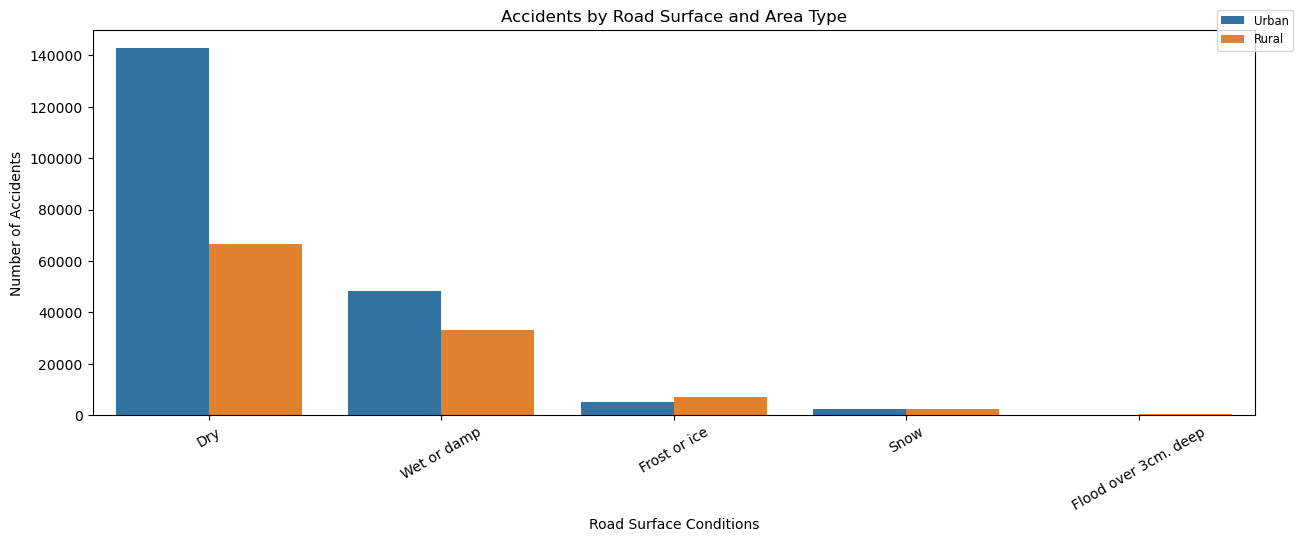

In [154]:
# Create a figure with a specified size (width=15, height=5)
plt.figure(figsize=(15, 5))

# Create a count plot to visualize the distribution of accidents based on road surface conditions
sns.countplot(data=df, x='Road_Surface_Conditions', hue='Urban_or_Rural_Area')

# Add a legend to the upper left corner outside the plot area
plt.legend(bbox_to_anchor=(1, 1), loc='center', fontsize='small')

plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Road Surface and Area Type')
plt.xticks(rotation=30)


Text(0, 0.5, ' ')

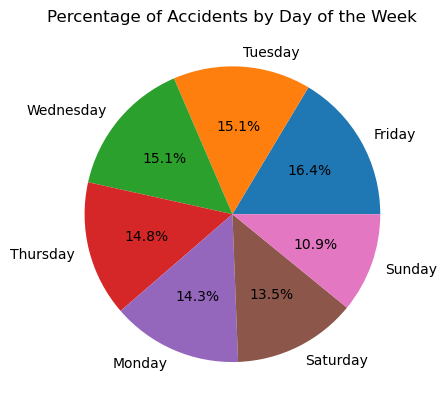

In [155]:
#make a pie chart to display thee percentage of accident per each day
df['Day_of_Week'].value_counts().plot(kind='pie', autopct='%0.1f%%')
plt.title('Percentage of Accidents by Day of the Week')
plt.ylabel(' ')

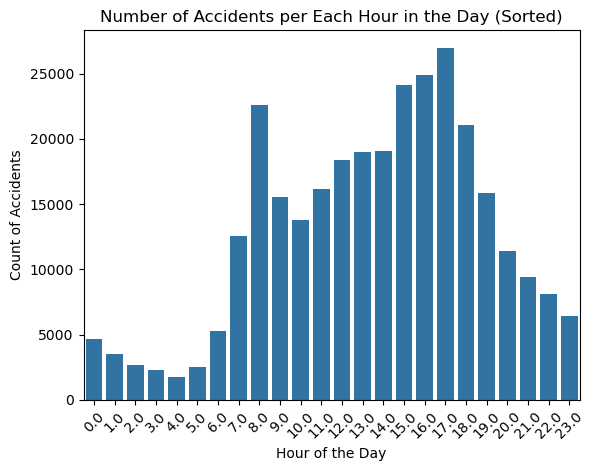

In [156]:
# Create a Bar plot to display the number of accidents per each hour in the day
df_sorted = df.sort_values(by='Hour_of_Accident')
sns.countplot(data=df_sorted, x='Hour_of_Accident')
plt.title('Number of Accidents per Each Hour in the Day (Sorted)')
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Accidents')
plt.xticks(rotation =45);

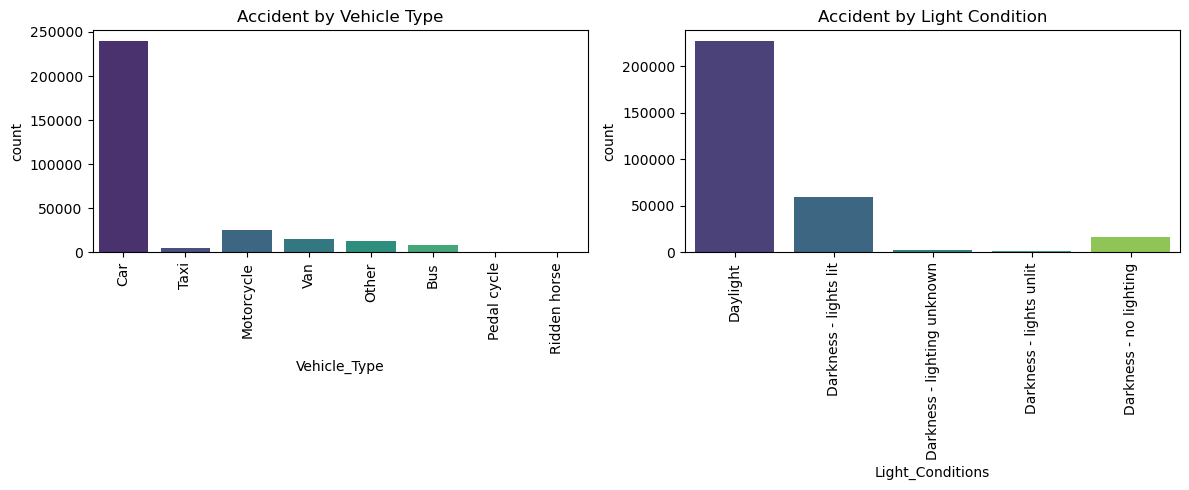

In [157]:
plt.figure(figsize=(12, 5))

# First subplot: Accident by vehicle type
plt.subplot(1, 2, 1)
sns.countplot(data=df, x="Vehicle_Type", hue="Vehicle_Type", palette="viridis", legend=False)
plt.title('Accident by Vehicle Type')
plt.xticks(rotation=90)

# Second subplot: Accident by light condition
plt.subplot(1, 2, 2)
sns.countplot(data=df, x="Light_Conditions", hue="Light_Conditions", palette="viridis", legend=False)
plt.title('Accident by Light Condition')
plt.xticks(rotation=90)

# Adjust layout to prevent overlapping
plt.tight_layout()

Text(0, 0.5, '')

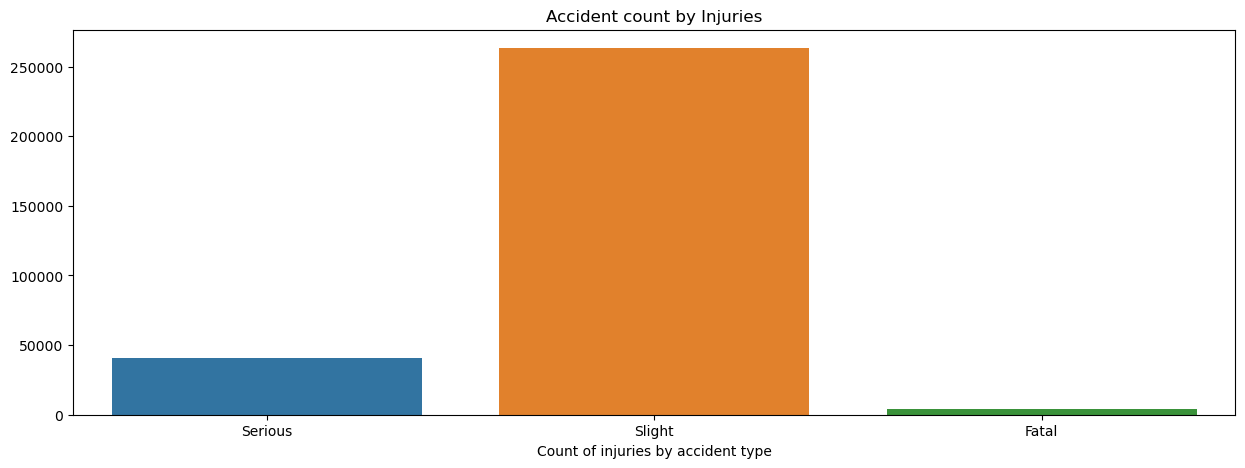

In [158]:
# Create a count plot to show the number of accident by Accident_Severity
plt.figure(figsize=(15,5))
sns.countplot(data = df, x='Accident_Severity',hue='Accident_Severity')
plt.title('Accident count by Injuries')
plt.xlabel('Count of injuries by accident type')
plt.ylabel('')

Text(0, 0.5, 'Speed Limit')

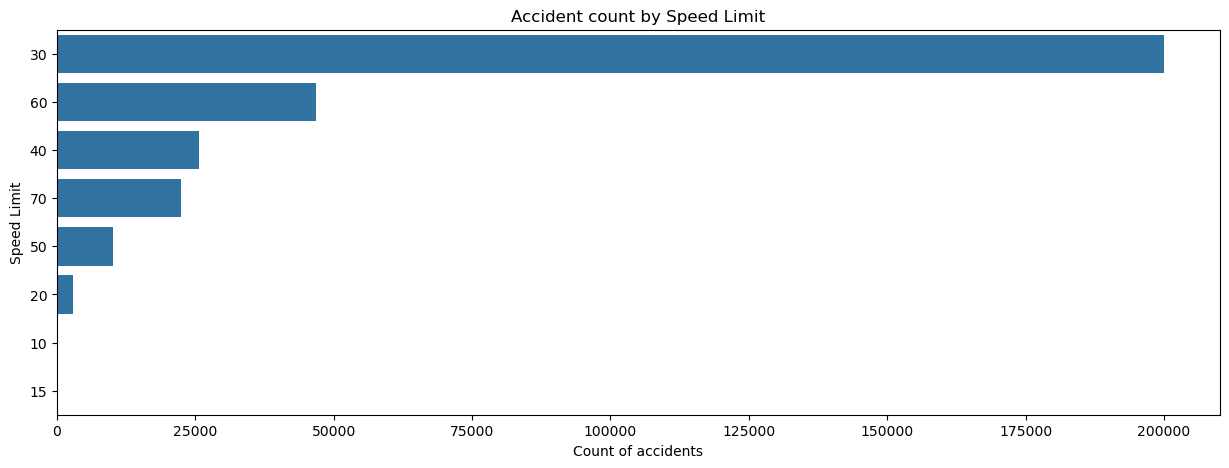

In [159]:
# Bar plot to show what is the most common accident speed limit
plt.figure(figsize = (15,5))
sns.countplot(data=df, y='Speed_limit', order=df['Speed_limit'].value_counts().index)
plt.title('Accident count by Speed Limit')
plt.xlabel('Count of accidents')
plt.ylabel('Speed Limit')

In [160]:
df.isna().sum()

Accident_ID                0
Accident Date              0
Day_of_Week                0
Junction_Detail            0
Accident_Severity          0
Light_Conditions           0
death_toll                 0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Speed_limit                0
Hour_of_Accident           0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

target_col = "Accident_Severity"

target = df[target_col]
features = df.drop(columns=[target_col])

X_train, X_test, y_train, y_test = train_test_split(
    features,
    target,
    test_size=0.1,
    random_state=42,
    stratify=target if target.nunique() > 1 else None
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

num_cols = X_train.select_dtypes(include=["number"]).columns.tolist()
cat_cols = X_train.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

print("Numerische Features:", len(num_cols))
print("Kategoriale Features:", len(cat_cols))


ohe = OneHotEncoder(handle_unknown="ignore", min_frequency=0.01, sparse_output=True)

encoder = ColumnTransformer(
    transformers=[("cat", ohe, cat_cols)],
    remainder="passthrough"
)

preprocess = ColumnTransformer(
    transformers=[
        ("cat", ohe, cat_cols),
    ],
    remainder="passthrough"  # numerische Spalten bleiben drin
)

model = RandomForestClassifier(
    random_state=42,
    n_estimators=50,
    max_depth=15,
    min_samples_leaf=5,
    class_weight="balanced",
    n_jobs=-1
)

pipeline = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", model)
])

pipeline.fit(X_train, y_train)

y_pred_rfc = pipeline.predict(X_test)

print("\nAccuracy:", round(accuracy_score(y_test, y_pred_rfc), 4))
print("\nClassification report:\n", classification_report(y_test, y_pred_rfc))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred_rfc))


Train shape: (277175, 14) Test shape: (30798, 14)
Numerische Features: 4
Kategoriale Features: 10

Accuracy: 0.6134

Classification report:
               precision    recall  f1-score   support

       Fatal       0.04      0.44      0.08       395
     Serious       0.19      0.36      0.25      4074
      Slight       0.90      0.66      0.76     26329

    accuracy                           0.61     30798
   macro avg       0.38      0.48      0.36     30798
weighted avg       0.80      0.61      0.68     30798


Confusion matrix:
 [[  172   117   106]
 [  852  1451  1771]
 [ 2905  6157 17267]]


In [196]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

num_cols = X_train.select_dtypes(include=["number"]).columns
cat_cols = X_train.select_dtypes(include=["object", "category", "bool"]).columns

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", min_frequency=0.01), cat_cols),
    ]
)

logistic_model = LogisticRegression(
    solver="liblinear",
    max_iter=1000,
    class_weight="balanced"
)

pipe = Pipeline([
    ("preprocess", preprocess),
    ("model", logistic_model)
])

pipe.fit(X_train, y_train)
y_pred_log = pipe.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred_log), 4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))


Accuracy: 0.8159
Confusion Matrix:
 [[   84     3   308]
 [  441    26  3607]
 [ 1228    82 25019]]
Classification Report:
               precision    recall  f1-score   support

       Fatal       0.05      0.21      0.08       395
     Serious       0.23      0.01      0.01      4074
      Slight       0.86      0.95      0.91     26329

    accuracy                           0.82     30798
   macro avg       0.38      0.39      0.33     30798
weighted avg       0.77      0.82      0.78     30798



In [198]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    random_state=42,
    max_depth=15,            
    min_samples_leaf=20,     
    class_weight="balanced" 
)

pipeline = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", model)
])

pipeline.fit(X_train, y_train)
y_pred_dtc = pipeline.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred_dtc), 4))
print("\nClassification report:\n", classification_report(y_test, y_pred_dtc))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred_dtc))


Accuracy: 0.5332

Classification report:
               precision    recall  f1-score   support

       Fatal       0.03      0.46      0.05       395
     Serious       0.17      0.32      0.23      4074
      Slight       0.90      0.57      0.70     26329

    accuracy                           0.53     30798
   macro avg       0.37      0.45      0.32     30798
weighted avg       0.79      0.53      0.63     30798


Confusion matrix:
 [[  180   115   100]
 [ 1235  1316  1523]
 [ 5224  6181 14924]]


In [200]:
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd

precision_rfc, recall_rfc, f1_rfc, _ = precision_recall_fscore_support(
    y_test, y_pred_rfc, average="weighted"
)

precision_log, recall_log, f1_log, _ = precision_recall_fscore_support(
    y_test, y_pred_log, average="weighted"
)

precision_dtc, recall_dtc, f1_dtc, _ = precision_recall_fscore_support(
    y_test, y_pred_dtc, average="weighted"
)


In [201]:
results_df = pd.DataFrame({
    "Model": ["Random Forest", "Logistic Regression", "Decision Tree"],
    "Precision": [precision_rfc, precision_log, precision_dtc],
    "Recall": [recall_rfc, recall_log, recall_dtc],
    "F1-Score": [f1_rfc, f1_log, f1_dtc]
})

results_df


,Model,Precision,Recall,F1-Score
0,Random Forest,0.796482,0.613352,0.682795
1,Logistic Regression,0.770819,0.815930,0.776712
2,Decision Tree,0.794259,0.533152,0.625581


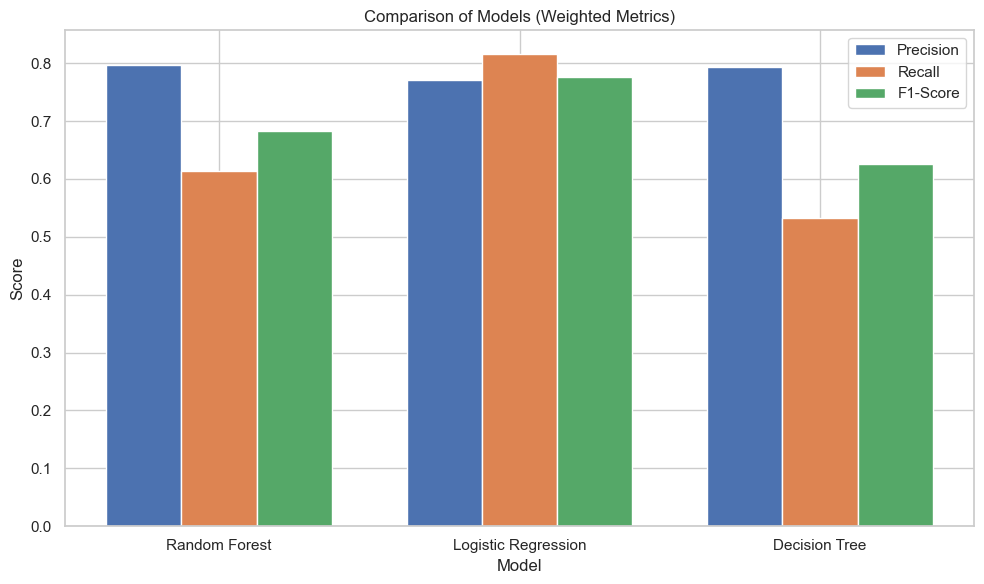

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

bar_width = 0.25
x = range(len(results_df))

plt.bar(x, results_df["Precision"], width=bar_width, label="Precision")
plt.bar([i + bar_width for i in x], results_df["Recall"], width=bar_width, label="Recall")
plt.bar([i + 2*bar_width for i in x], results_df["F1-Score"], width=bar_width, label="F1-Score")

plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Comparison of Models (Weighted Metrics)")
plt.xticks([i + bar_width for i in x], results_df["Model"])
plt.legend()
plt.tight_layout()
plt.show()
